In [1]:
#PLEASE NOTE THAT THIS IS NOT MY CODE I GOT THIS CODE FROM:http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
#this is a function that I want to share because I thought it was useful for making figures for posters and papers

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [19]:
#loading in the dataset and making sure it loaded correctly
psge15<-read.table("psge15 for class.csv", sep=',', header=TRUE)
head(psge15)

trial,loc,row,plant,block,accession,loo,treat,stock_id,IZPT.bt,IZPT.en1e,gen,DTS,DTA
PGSE,NC,1,1,1,NC.s.g2,NC,s,13.1.27606.00001.000000,170,90,2,69,69
PGSE,NC,1,2,1,NC.s.g2,NC,s,13.1.27606.00001.000000,180,85,2,65,67
PGSE,NC,1,3,1,NC.s.g2,NC,s,13.1.27606.00001.000000,210,100,2,69,71
PGSE,NC,1,4,1,NC.s.g2,NC,s,13.1.27606.00001.000000,200,110,2,76,73
PGSE,NC,1,5,1,NC.s.g2,NC,s,13.1.27606.00001.000000,185,85,2,69,69
PGSE,NC,1,6,1,NC.s.g2,NC,s,13.1.27606.00001.000000,170,105,2,72,68


In [20]:
#here I am doing some QC on the height data
#calculating the ratio of Ear height/plant height
psge15$height.ratio<-psge15$IZPT.en1e/psge15$IZPT.bt

#getting rid of 'outliers' for plant and ear height that fall outside these ratios 
psge15$IZPT.bt[psge15$height.ratio>0.75]<-NA
psge15$IZPT.bt[psge15$height.ratio<0.25]<-NA

psge15$IZPT.en1e[psge15$height.ratio>0.75]<-NA
psge15$IZPT.en1e[psge15$height.ratio<0.25]<-NA

#recoding so that the line 'B73xMo17' is coded as a check (1) and the other lines are (0)
psge15$check<-0
psge15$check[psge15$accession=="B73xMo17"]<-1


In [21]:
#loading the ggplot2 package
library('ggplot2')


Warning message:
"Removed 105 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 105 rows containing missing values (geom_point)."

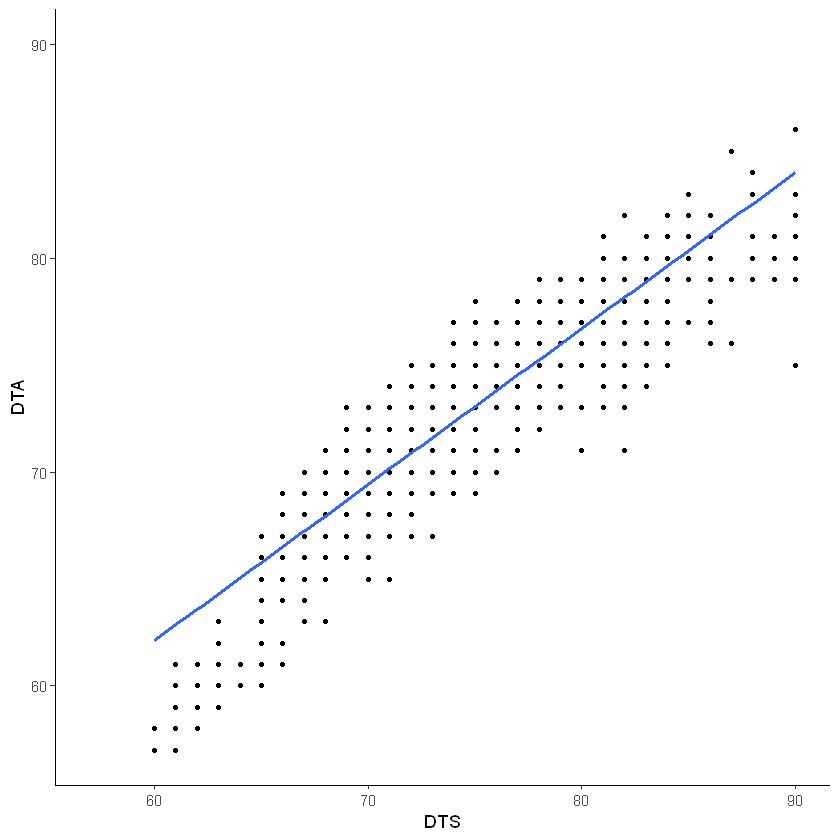

In [11]:
#this plot shows a scatter plot of days to silking and days to anthesis. 
#I am adding my own labels, adding a trendline, changning the theme to the classic plot, and setting the limits of the graph.
p3<-ggplot(psge15, aes(x=DTS,y=DTA))+geom_point(size=1)+ xlab("DTS")+ylab("DTA")+geom_smooth(method=lm,se=FALSE)+theme_classic()+xlim(57,90)+ylim(57,90)
p3

Warning message:
"Removed 154 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 154 rows containing missing values (geom_point)."

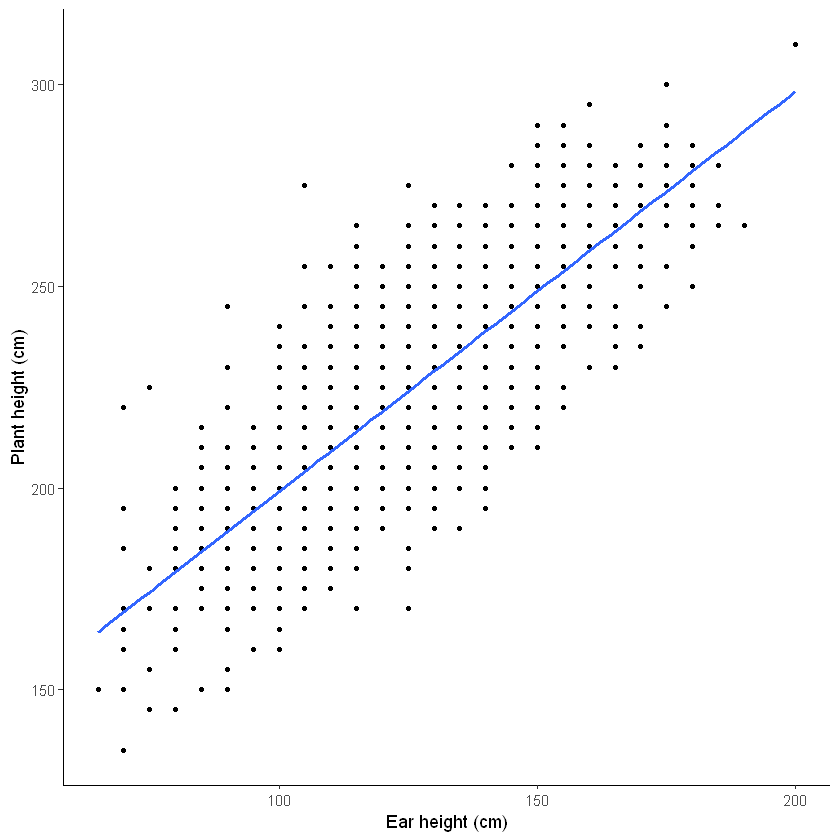

In [15]:
#I am creating a scatter plot of plant height and ear height of maize. I want it to look similar to the flowering time plot so I am using the same paramters as above. 
p4<-ggplot(psge15, aes(x=IZPT.en1e,y=IZPT.bt))+geom_point(size=1)+geom_smooth(method=lm,se=FALSE)+xlab("Ear height (cm)") +
  ylab("Plant height (cm)")+theme_classic()
p4


Warning message:
"Removed 88 rows containing non-finite values (stat_summary)."Warning message:
"Removed 88 rows containing missing values (geom_point)."

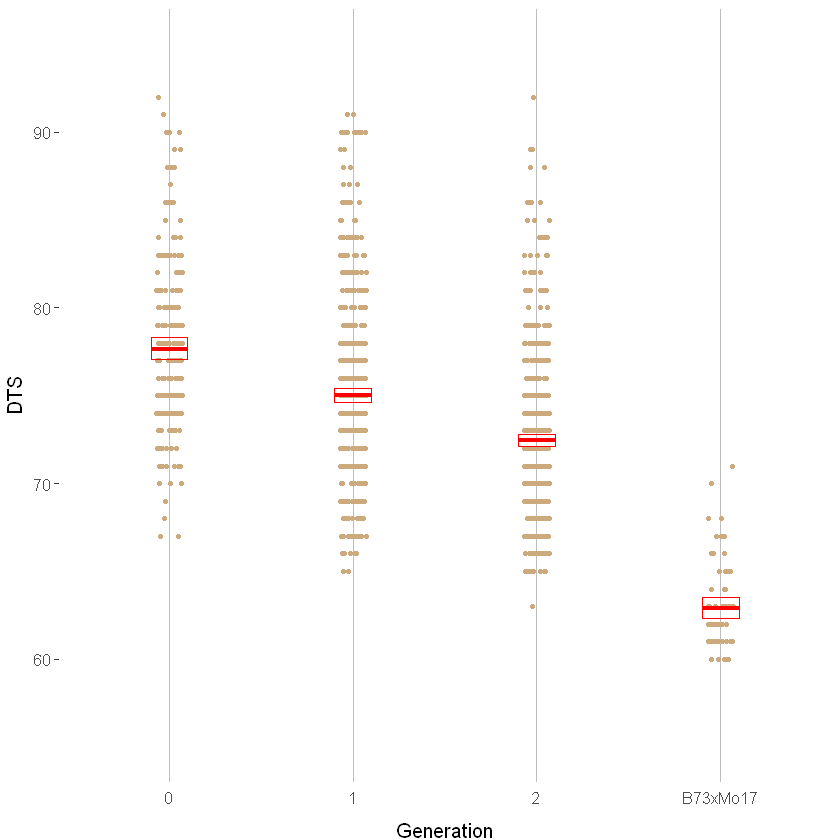

In [13]:
#This is an interesting plot to make, but I basically want to show my data over 2 generations of selection and then show the check genotype 'B73xMo17'
#I want it to look clean so I am making the background blank. I also want to show that over 2 generations, selection for silking has gotten earlier, so I plotted the mean with the stat_summary function
MF<-ggplot(data=psge15, aes(x=gen, y=DTS)) +
  geom_point(cex=1, col="burlywood3", position = position_jitter(w=0.07, h=0.0))+stat_summary(fun.data = "mean_cl_boot", geom = "crossbar",
                       colour = "red", width = 0.2) + xlab("treatment")+
  xlab("Generation") +
  ylab("DTS")+theme(plot.background = element_blank() ,panel.grid.minor = element_blank(),panel.grid.major.x = element_line(colour="grey", size = 0.5),panel.grid.major.y = element_blank(),panel.border = element_blank() ,panel.background = element_blank() ,axis.title.x = element_text(size=12, vjust=-2),axis.text.x = element_text(size=10),axis.text.y = element_text(size=10, hjust=1, vjust=0.5) ,axis.title.y = element_text(size=12, vjust=2) ,strip.text.y = element_text(angle = 0),axis.ticks.x = element_blank())+ylim(55,95)
MF

Warning message:
"Removed 139 rows containing non-finite values (stat_summary)."Warning message:
"Removed 139 rows containing missing values (geom_point)."

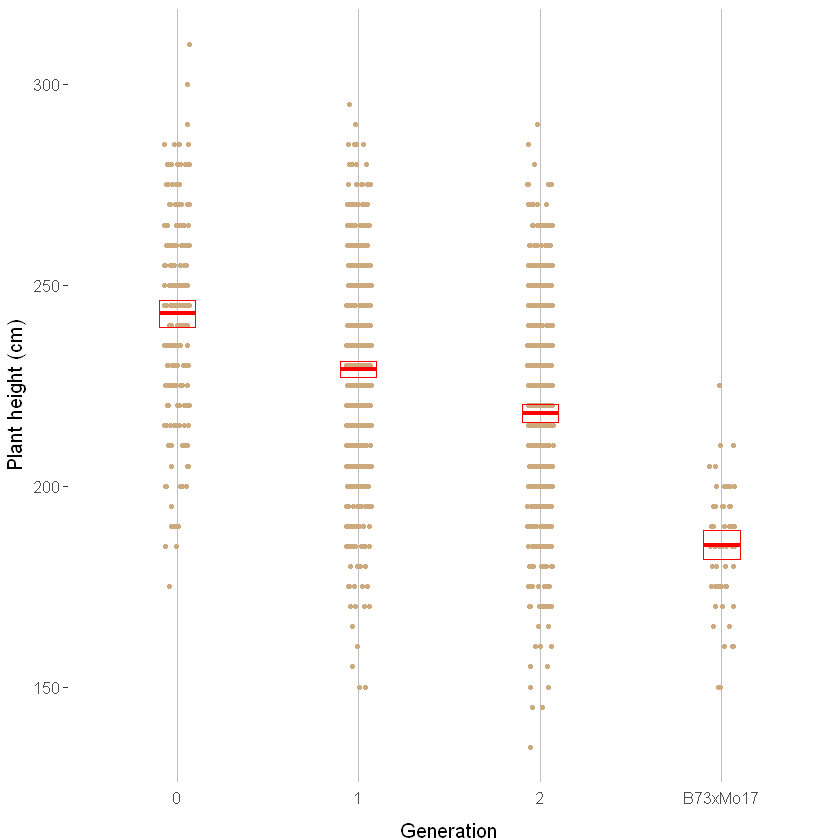

In [17]:
#This is the same plot as the DTS by generation plot but with plant height. I am using the same parameters as above but changed the information for plant height
PH<-ggplot(data=psge15, aes(x=gen, y=IZPT.bt)) +
  geom_point(cex=1, col="burlywood3", position = position_jitter(w=0.07, h=0.0))+stat_summary(fun.data = "mean_cl_boot", geom = "crossbar",
                       colour = "red", width = 0.2) + xlab("treatment")+
  xlab("Generation") +
  ylab("Plant height (cm)")+theme(plot.background = element_blank() ,panel.grid.minor = element_blank(),panel.grid.major.x = element_line(colour="grey", size = 0.5),panel.grid.major.y = element_blank(),panel.border = element_blank() ,panel.background = element_blank() ,axis.title.x = element_text(size=12, vjust=-2),axis.text.x = element_text(size=10),axis.text.y = element_text(size=10, hjust=1, vjust=0.5) ,axis.title.y = element_text(size=12, vjust=2) ,strip.text.y = element_text(angle = 0),axis.ticks.x = element_blank())
PH

Warning message:
"Removed 105 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 105 rows containing missing values (geom_point)."Warning message:
"Removed 88 rows containing non-finite values (stat_summary)."Warning message:
"Removed 88 rows containing missing values (geom_point)."Warning message:
"Removed 154 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 154 rows containing missing values (geom_point)."Warning message:
"Removed 139 rows containing non-finite values (stat_summary)."Warning message:
"Removed 139 rows containing missing values (geom_point)."

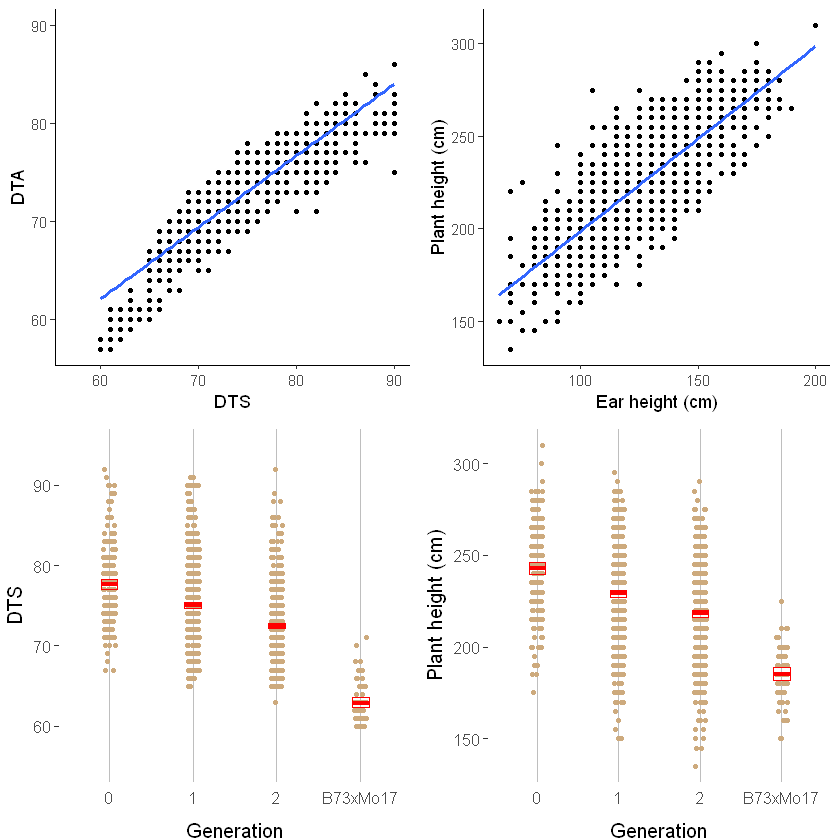

In [18]:
#here I am going to put all four graphs together 
#I am going to use the multiplot function that we loaded at the beginning. 
#in the fuction, the first plot (p3) is the top left, the second plot (MF) goes below it, then p4 goes top right, and PH goes bottom right.
#you can add as many columns
multiplot(p3, MF,p4,PH,cols=2)